## 코로나 업종 뉴스 기사 검색

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen

import pandas as pd
import re

### # 웹크롤링한 데이터 읽어오기

In [2]:
# df = pd.read_csv('data/exam-WebParsing.csv')       
df = pd.read_csv('data/covid_2020.csv') 
df.head()

,Unnamed: 0,오늘날짜,기사시점,기사제목,URL
0,0,2022-06-21_14시51분,2020. 2. 20.,코로나19 국내 첫 사망자 발생…63세 남성 사후 확진(종합),https://www.yna.co.kr/view/AKR20200220163551017
1,1,2022-06-21_14시51분,2020. 1. 20.,우한 폐렴: 코로나바이러스 국내 첫 확진자 발생...현재까지 확인된 감염자 200명 넘어,https://www.bbc.com/korean/news-51165909
2,2,2022-06-21_14시51분,2020. 11. 10.,코로나 백신: 90% 넘는 효능 보여준 새로운 백신이 넘어야 할 난관들,https://www.bbc.com/korean/international-54883322
3,3,2022-06-21_14시51분,2020. 1. 31.,신종 코로나바이러스: 11번째 환자 확인...현재까지 확진 사례 정리,https://www.bbc.com/korean/news-51320986
4,4,2022-06-21_14시51분,2020. 11. 17.,"코로나19 백신: 모더나, '코로나 백신 94.5% 예방 효과'",https://www.bbc.com/korean/news-54969735


In [3]:
# index_col='Unnamed: 0'') 삭제
del df['Unnamed: 0']
df.head()

,오늘날짜,기사시점,기사제목,URL
0,2022-06-21_14시51분,2020. 2. 20.,코로나19 국내 첫 사망자 발생…63세 남성 사후 확진(종합),https://www.yna.co.kr/view/AKR20200220163551017
1,2022-06-21_14시51분,2020. 1. 20.,우한 폐렴: 코로나바이러스 국내 첫 확진자 발생...현재까지 확인된 감염자 200명 넘어,https://www.bbc.com/korean/news-51165909
2,2022-06-21_14시51분,2020. 11. 10.,코로나 백신: 90% 넘는 효능 보여준 새로운 백신이 넘어야 할 난관들,https://www.bbc.com/korean/international-54883322
3,2022-06-21_14시51분,2020. 1. 31.,신종 코로나바이러스: 11번째 환자 확인...현재까지 확진 사례 정리,https://www.bbc.com/korean/news-51320986
4,2022-06-21_14시51분,2020. 11. 17.,"코로나19 백신: 모더나, '코로나 백신 94.5% 예방 효과'",https://www.bbc.com/korean/news-54969735


In [4]:
len(df)

100

### # 첫번째 URL 페이지 크롤링하기

In [5]:
def get_read_web(url):    
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, "lxml")    
    return soup

In [7]:
news_Text = str()

for i in range(len(df)):
    soup = get_read_web(df['URL'][i])
    news_data = soup.get_text()
    news_text = news_data.replace('\t', ' ')
    news_text = news_text.replace('\n', ' ')
    news_text = news_text.replace('\r', ' ')
    news_text = news_text.strip()
    news_Text = news_Text + news_text

### # 워드클라우드

In [132]:
from konlpy.tag import Okt

In [133]:
okt = Okt()

In [134]:
news_nouns = okt.nouns(news_Text)
news_nouns

['코로나',
 '국내',
 '첫',
 '사망자',
 '발생',
 '세',
 '남성',
 '사후',
 '확진',
 '종합',
 '연합뉴스',
 '연합뉴스',
 '본문',
 '바로가기',
 '메뉴',
 '바로가기',
 '연합뉴스',
 '최신',
 '기사',
 '일시',
 '정지',
 '목록',
 '국가',
 '기간',
 '뉴스',
 '통신사',
 '연합뉴스',
 '최신',
 '기사',
 '정치',
 '북한',
 '경제',
 '산업',
 '사회',
 '전국',
 '세계',
 '문화',
 '라이프',
 '연예',
 '스포츠',
 '피니언',
 '사람',
 '비주',
 '얼',
 '뉴스',
 '코로나',
 '제보',
 '이전',
 '다음',
 '정치',
 '전체',
 '기사',
 '대통령실',
 '총리실',
 '국회',
 '정당',
 '외교',
 '국방',
 '북한',
 '전체',
 '기사',
 '인물',
 '학술',
 '연구',
 '영상',
 '경제',
 '전체',
 '기사',
 '경제',
 '정책',
 '금융',
 '증시',
 '재테크',
 '부동산',
 '취업',
 '창업',
 '소비자',
 '국제경제',
 '산업',
 '전체',
 '기사',
 '산업',
 '기업',
 '전기',
 '전자',
 '중',
 '화학',
 '자동차',
 '건설',
 '에너지',
 '자원',
 '과학',
 '게임',
 '유통',
 '서비스',
 '중기',
 '처',
 '바이오',
 '헬스',
 '농림',
 '축산',
 '해양',
 '수산',
 '사회',
 '전체',
 '기사',
 '사건',
 '사고',
 '법원',
 '검찰',
 '교육',
 '복지',
 '노동',
 '환경',
 '여성',
 '아동',
 '재외동포',
 '다문화',
 '전국',
 '전체',
 '기사',
 '경기',
 '인천',
 '부산',
 '울산',
 '경남',
 '대구',
 '경북',
 '광주',
 '전남',
 '전북',
 '대전',
 '충남',
 '세종',
 '충북',
 '강원',
 '제주',
 '세계',
 '전체'

In [135]:
news_nouns[:10]

['코로나', '국내', '첫', '사망자', '발생', '세', '남성', '사후', '확진', '종합']

In [136]:
one_words = []
tow_words = []
etc_words = []

for noun in news_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(13006, 50641, 15739)

In [137]:
stop_words = ['뉴스','한경','기사','업종','코로나',
              '기자','전체','구독','보기','메뉴',
              '바로가기','스포츠','연합뉴스','검색',
              '검색','관련','신문','대비','번호',
              '한겨레','센터','경우','한국','문의',
              '광고','댓글','트위터','영상','포토',
              '칼럼','페이스북','연예','김건희', '네이버',
              '폰트','로그인', '진자', '발사', '코로나바이러스',
              '연재','리포트','소개','저작권','출처',
              '위해','통해','다운로드'
             ]
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

13053

In [138]:
# stop_words 빼기
news_nouns = [ word for word in news_nouns if word not in stop_words ]
len(news_nouns)

59201

In [139]:
import nltk

In [140]:
news_text = nltk.Text(news_nouns)
type(news_text), len(news_text)

(nltk.text.Text, 59201)

In [141]:
# 상위 500개 수 
data = news_text.vocab().most_common(300)
# data = news_text.vocab()
data

[('감염', 530),
 ('환자', 520),
 ('바이러스', 455),
 ('중국', 419),
 ('누리', 406),
 ('신종', 394),
 ('과학', 359),
 ('백신', 345),
 ('이유', 343),
 ('미국', 294),
 ('세계', 285),
 ('공유', 276),
 ('우주', 249),
 ('업데이트', 245),
 ('비디오', 242),
 ('치료', 226),
 ('대한', 223),
 ('발생', 222),
 ('마지막', 219),
 ('의료', 211),
 ('결과', 208),
 ('사람', 207),
 ('확진', 206),
 ('연구', 202),
 ('시간', 202),
 ('코리아', 197),
 ('사이언스', 189),
 ('과학기술', 186),
 ('정책', 185),
 ('영국', 185),
 ('다른', 182),
 ('미래', 181),
 ('사진', 177),
 ('지금', 174),
 ('국내', 171),
 ('개발', 168),
 ('확산', 168),
 ('우리', 166),
 ('병원', 163),
 ('이용', 161),
 ('설명', 159),
 ('사망자', 157),
 ('사례', 154),
 ('검사', 153),
 ('격리', 152),
 ('확인', 149),
 ('지역', 148),
 ('다시', 144),
 ('현재', 144),
 ('사회', 143),
 ('논란', 143),
 ('가지', 142),
 ('상황', 141),
 ('당국', 139),
 ('대통령', 135),
 ('우려', 132),
 ('질병', 129),
 ('이번', 128),
 ('분석', 123),
 ('교수', 121),
 ('최대', 121),
 ('우한', 120),
 ('산업', 119),
 ('시작', 119),
 ('발표', 118),
 ('전쟁', 118),
 ('정부', 117),
 ('지난', 116),
 ('인상', 112),
 ('인간', 111),
 ('발견',

In [143]:
from pandas import Series, DataFrame

In [145]:
frame.to_excel('data/covid_2020_words.xlsx', encoding='UTF-8')

### # 워드클라우드 한글폰트 설정

In [93]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [94]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

500

In [19]:
# !pip install wordcloud

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

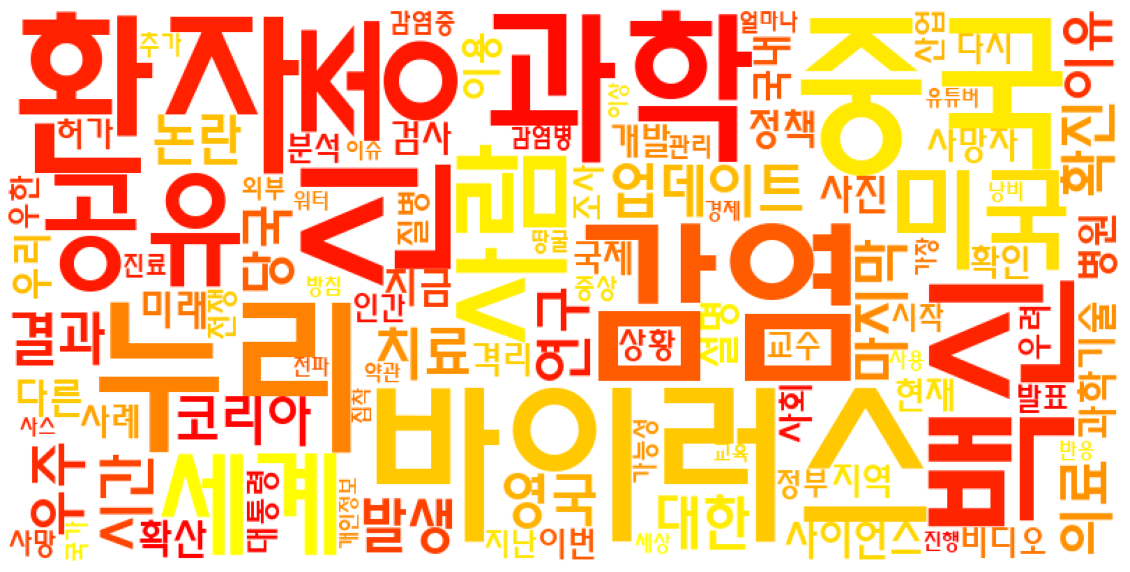

In [96]:
params = {
    "width"            : 800,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "colormap"         : 'autumn',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/covid_2020_300.png'

plt.figure(figsize=(20,12))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

In [ ]:
# 누리 : 코로나 예방접종 사전예약시스템

In [142]:
# 단어별 건수 확인

VC_words = list()
VC_cnt = list()

for i in range(len(data)):
    vc_words = data[i][0]
    vc_cnt = data[i][1]
  
    VC_words.append(vc_words)
    VC_cnt.append(vc_cnt)

In [ ]:
from pandas import Series, DataFrame

In [144]:
data = {'words': VC_words,
        'cnt' : VC_cnt,}
frame = DataFrame(data)
frame

,words,cnt
0,감염,530
1,환자,520
2,바이러스,455
3,중국,419
4,누리,406
...,...,...
495,수소,30
496,닥터스,30
497,유사과학,30
498,사이비과학,30
